<a href="https://colab.research.google.com/github/dominiksakic/NETworkingMay/blob/main/00_classify_nums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Num of training samples: 60000
Num of Test samples: 10000
Tensor shape img: (28, 28)
Label is scalar val: 5


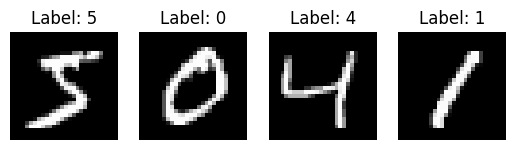

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print some examples
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(f"Label: {train_labels[i]}")
  plt.axis("off")

print(f"Num of training samples: {len(train_images)}")
print(f"Num of Test samples: {len(test_images)}")
print(f"Tensor shape img: {train_images[0].shape}")
print(f"Label is scalar val: {train_labels[0]}")

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Normalize Training and Test data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [4]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8742 - loss: 0.4315
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9684 - loss: 0.1137
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9781 - loss: 0.0740
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9850 - loss: 0.0525
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9885 - loss: 0.0372


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0838
test_acc: 0.9783999919891357
